In [2]:
import pandas as pd

# Source Standford Social Science Collection
## Data collection period  July 13, 2017-August 1, 2017

In [3]:
'''duration,
xlgb
S1 are u married
S2 do you have a bf,gf,sexual/romantic partner
S3 have u ever had a bf,gf,sexual/romantic partner
Q5 is your partner same sex as you
Q32 did you choose an internet service to meet
Q17A including current one, how many times have u been married
Q21A_Year in what year did you first meet
Q21B_Year in what year did you first have a romantic relationship
Q21D_Year in what year did you marry

'''

'duration,\nxlgb\nS1 are u married\nS2 do you have a bf,gf,sexual/romantic partner\nS3 have u ever had a bf,gf,sexual/romantic partner\nQ5 is your partner same sex as you\nQ32 did you choose an internet service to meet\nQ17A including current one, how many times have u been married\nQ21A_Year in what year did you first meet\nQ21B_Year in what year did you first have a romantic relationship\nQ21D_Year in what year did you marry\n\n'

In [41]:
data = pd.io.stata.read_stata('HCMST 2017 fresh sample for public sharing draft v1.1.dta')
data.to_csv('HCMST 2017 fresh sample for public sharing draft v1.1.csv')
raw=pd.read_csv('HCMST 2017 fresh sample for public sharing draft v1.1.csv')
raw.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [42]:
useful_columns=['xlgb','S1','S2','S3','Q5','Q32','Q17A','Q21A_Year','Q21B_Year','Q21D_Year']
df=raw[useful_columns]

In [43]:
df.dtypes

xlgb         object
S1           object
S2           object
S3           object
Q5           object
Q32          object
Q17A         object
Q21A_Year    object
Q21B_Year    object
Q21D_Year    object
dtype: object

In [44]:
#Renaming column heads
df.columns=["LGB","Married(Y/N)","Partner(Y/N)","Ever_have_partner(Y/N)","Same_sex_partner(Y/N)","Internet_service_used","No_of_marriage","Year_met","Year_together","Year_married"]
df.shape

(3510, 10)

In [45]:
#Replacing variables on first 6 columns with better naming
clean_1=df.replace('gen pop','General').replace('LGB sample', 'LGB').replace('No, I am not Married','N').replace('Yes, I am Married','Y').replace('No, I am single, with no boyfriend, no girlfriend and no romantic or sexual partner','N').replace('Yes, I have a sexual partner (boyfriend or girlfriend)','Y').replace('I have a romantic partner who is not yet a sexual partner','Y').replace('No, we are an opposite-sex couple','N').replace('Yes, we are a same-sex couple','Y').replace('No, I did NOT meet [Partner Name] through the Internet','N').replace('Yes, an Internet dating or matchmaking site (like eHarmony or match.com)','Matchmaking site')


In [46]:
#Replacing variables of 'Internet_service_used' column
clean_2=clean_1.replace('Yes, an Internet dating or matchmaking site (like eHarmony or match.com)','Matchmaking site').replace('Yes, an app on my phone (like Tinder or Grindr)','Dating App').replace('Yes, an Internet chat room','Others').replace('Yes, an Internet classified advertising site (like Craigslist)','Others').replace('Yes, a social networking site (like Facebook or Myspace)','Social networking site').replace('Yes, a different kind of Internet service','Others').replace('Refused','Others')

In [47]:
clean_2

,LGB,Married(Y/N),Partner(Y/N),Ever_have_partner(Y/N),Same_sex_partner(Y/N),Internet_service_used,No_of_marriage,Year_met,Year_together,Year_married
0,LGB,N,N,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,General,Y,NaN,NaN,NaN,N,Once (this is my first marriage),1983,1995,1996
2,General,Y,NaN,NaN,NaN,Matchmaking site,Once (this is my first marriage),2006,2006,2008
3,General,N,N,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,General,Y,NaN,NaN,NaN,N,Once (this is my first marriage),1983,1983,1984
5,General,Y,NaN,NaN,N,N,Once (this is my first marriage),1981,1982,1982
6,General,Y,NaN,NaN,NaN,N,Once (this is my first marriage),1966,1967,1969
7,General,Y,NaN,NaN,NaN,N,Once (this is my first marriage),1967,1967,1970
8,General,N,N,No,NaN,NaN,NaN,NaN,NaN,NaN
9,General,N,N,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#Replacing variables of 'No_of_marriage' column
clean_3=clean_2.replace({'Once (this is my first marriage)':'1','Twice':'2','Three times':'3','Four or more times':'4 or more'})

# table for plot 1

,LGB,Married(Y/N),Partner(Y/N),Ever_have_partner(Y/N),Same_sex_partner(Y/N),Internet_service_used,No_of_marriage,Year_met,Year_together,Year_married
0,LGB,N,N,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,General,Y,NaN,NaN,NaN,N,1,1983,1995,1996
2,General,Y,NaN,NaN,NaN,Matchmaking site,1,2006,2006,2008
3,General,N,N,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,General,Y,NaN,NaN,NaN,N,1,1983,1983,1984


In [50]:
#Fill nan entries with zeros 
clean_3[['Year_met','Year_together','Year_married']]=clean_3[['Year_met','Year_together','Year_married']].fillna(0)

In [86]:
#Replace the rest of values with zeros
clean_3['Year_together'].replace('Others','0',inplace=True)
clean_3['Year_met'].replace('Others','0',inplace=True)
clean_3['Year_married'].replace('Others','0',inplace=True)

In [87]:
#Change data type to perform mathematical calculation
clean_3[['Year_together','Year_met','Year_married']]=clean_3[['Year_together','Year_met','Year_married']].astype('int')


In [90]:
clean_4=clean_3[clean_3.Year_met != 0]
clean_5=clean_4[clean_4.Year_together != 0]
clean_5.iloc[20:40]

,LGB,Married(Y/N),Partner(Y/N),Ever_have_partner(Y/N),Same_sex_partner(Y/N),Internet_service_used,No_of_marriage,Year_met,Year_together,Year_married
30,General,Y,NaN,NaN,NaN,N,1,2006,2014,2014
32,LGB,Y,NaN,NaN,Y,N,2,1977,1977,2016
35,General,Y,NaN,NaN,NaN,N,1,1999,2000,2007
36,General,N,Y,NaN,NaN,N,NaN,2016,2017,0
37,General,Y,NaN,NaN,NaN,Others,3,1999,1999,2005
38,General,N,Y,NaN,NaN,N,NaN,2010,2010,0
40,LGB,Y,NaN,NaN,N,N,1,1988,1988,1988
41,General,N,Y,NaN,NaN,N,NaN,2013,2016,0
42,General,Y,NaN,NaN,NaN,N,4 or more,2006,2006,2007
43,General,N,Y,NaN,NaN,Matchmaking site,NaN,2017,2017,0


In [136]:
#Creating new column of difference between 'Year_together' and 'Year_met'
clean_5['Met_to_together']=(clean_5['Year_together']-clean_5['Year_met'])
clean_5.iloc[30:40]
for_plot=clean_5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Ready plot

In [145]:
for_plot1= for_plot.groupby(['Internet_service_used']).mean().round(2)
for_plot1=for_plot1.rename(index={'N':'No online service used'})
for_plot1

,Year_met,Year_together,Year_married,Met_to_together
Internet_service_used,,,,
Dating App,2014.81,2014.96,373.26,0.15
Matchmaking site,2010.46,2010.90,913.71,0.44
No online service used,1991.45,1993.16,1530.66,1.71
Others,2005.47,2006.52,932.30,1.04
Social networking site,2009.68,2010.74,990.08,1.06


In [146]:
for_plot_2009=for_plot[for_plot['Year_met'] < 2009]
for_plot_2009.head()

,LGB,Married(Y/N),Partner(Y/N),Ever_have_partner(Y/N),Same_sex_partner(Y/N),Internet_service_used,No_of_marriage,Year_met,Year_together,Year_married,Met_to_together
1,General,Y,NaN,NaN,NaN,N,1,1983,1995,1996,12
2,General,Y,NaN,NaN,NaN,Matchmaking site,1,2006,2006,2008,0
4,General,Y,NaN,NaN,NaN,N,1,1983,1983,1984,0
5,General,Y,NaN,NaN,N,N,1,1981,1982,1982,1
6,General,Y,NaN,NaN,NaN,N,1,1966,1967,1969,1


In [147]:
for_plot_2009=for_plot_2009.groupby(['Internet_service_used']).mean().round(2)
for_plot_2009=for_plot_2009.rename(index={'N':'No online service used'})
row=pd.Series({'Met_to_together':0.0}, name='Dating App')
for_plot_2009=for_plot_2009.append(row)
for_plot_2009.sort_index()

,Year_met,Year_together,Year_married,Met_to_together
Internet_service_used,,,,
Dating App,NaN,NaN,NaN,0.00
Matchmaking site,2003.25,2004.33,1588.90,1.08
No online service used,1986.69,1988.64,1745.57,1.95
Others,1999.80,2001.08,1393.80,1.29
Social networking site,2004.50,2006.62,1545.85,2.12


In [148]:
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.axis.XTick at 0x11dc5d748>,
 <a list of 5 Text xticklabel objects>)

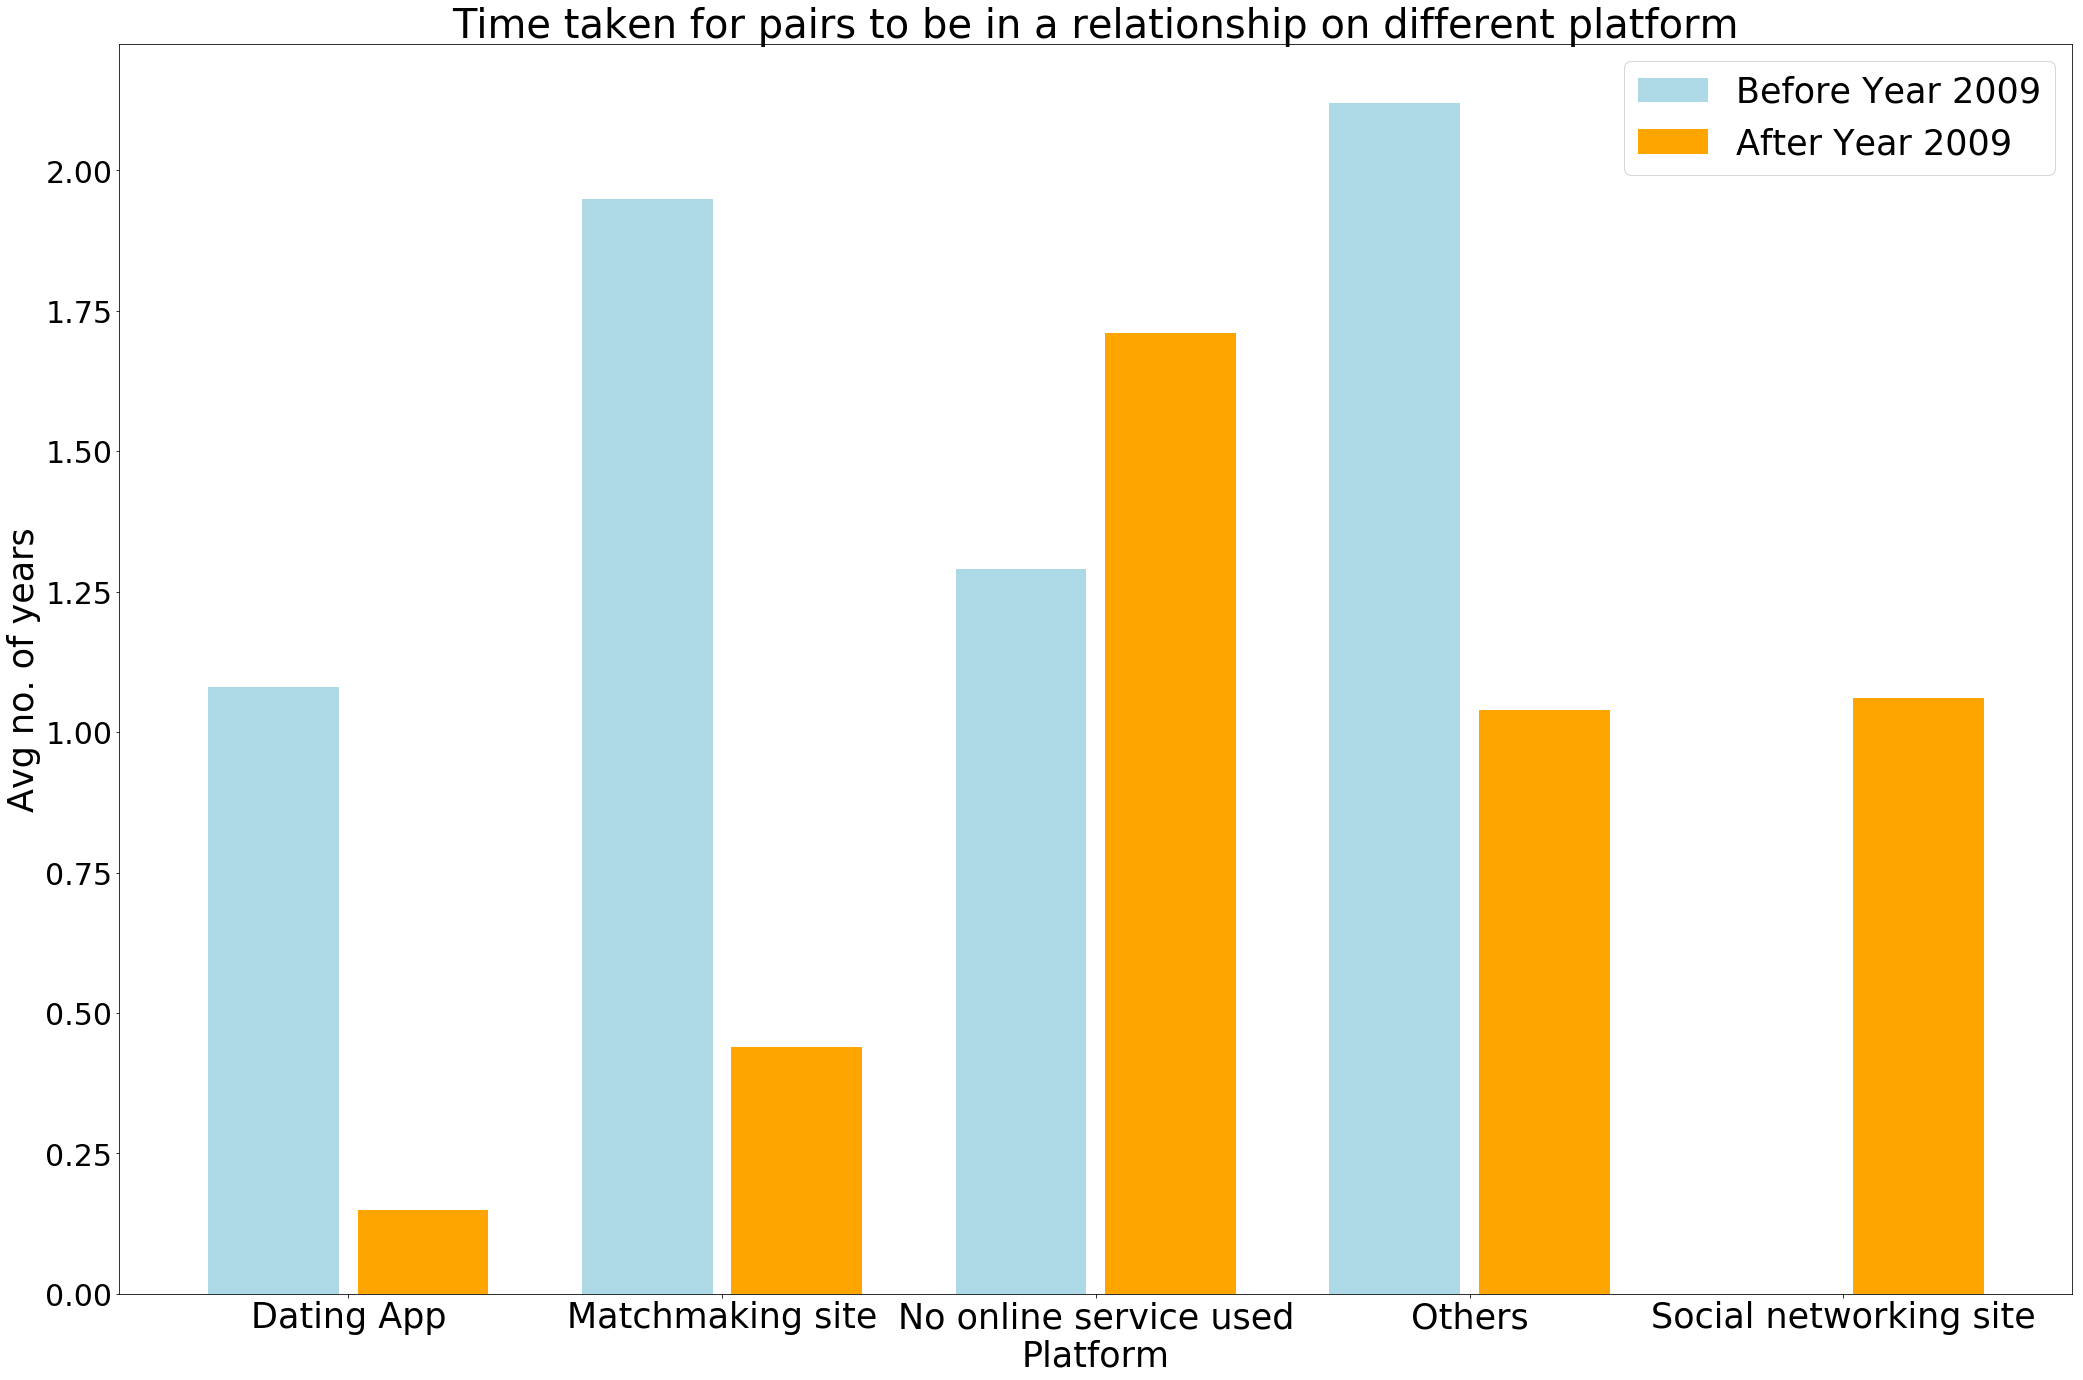

In [158]:
data = [for_plot1['Met_to_together'],for_plot_2009['Met_to_together']]
X = np.arange(5)
cat=for_plot1.index
fig=plt.figure(figsize=(35,23))

plt.bar(X + 0.00, data[1], color = 'lightblue', width = 0.35, tick_label= 'before')
plt.bar(X + 0.4, data[0], color = 'orange', width = 0.35, tick_label= 'after')
plt.legend(('Before Year 2009','After Year 2009'), fontsize=35)
plt.title('Time taken for pairs to be in a relationship on different platform', fontsize=40)

plt.xlabel('Platform',fontsize=35)
plt.ylabel('Avg no. of years',fontsize=35)
plt.yticks(fontsize=30)

plt.xticks(X + 0.2, cat, fontsize = 35)
